In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df = pd.read_csv(r'C:\Users\Fakhruddin\Downloads\archive (7)\car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [10]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

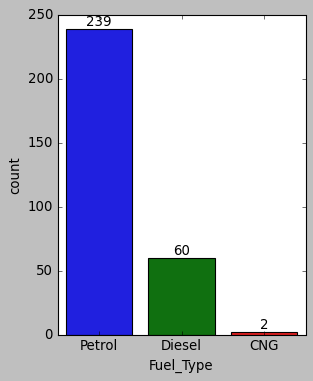

In [11]:
style.use('classic')
plt.figure(figsize=(4,5))

ax=sns.countplot(data=df,x='Fuel_Type')
ax.bar_label(ax.containers[0])


plt.show()

In [12]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

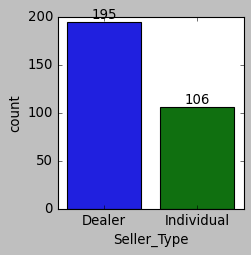

In [13]:
plt.figure(figsize=(3,3))

ax=sns.countplot(data=df,x='Seller_Type')
ax.bar_label(ax.containers[0])


plt.show()

In [14]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

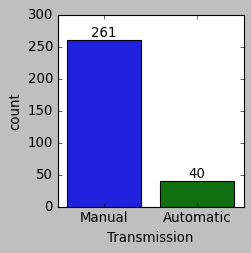

In [15]:
plt.figure(figsize=(3,3))

ax=sns.countplot(data=df,x='Transmission')
ax.bar_label(ax.containers[0])


plt.show()

In [16]:
df['Car_Name'].value_counts().head(10)

city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: Car_Name, dtype: int64

In [30]:
### encoding fuel type
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

### encoding seller type
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

### encoding transmission
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [31]:
data = df.drop('Car_Name',axis=1)

In [32]:
data.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0


<AxesSubplot:>

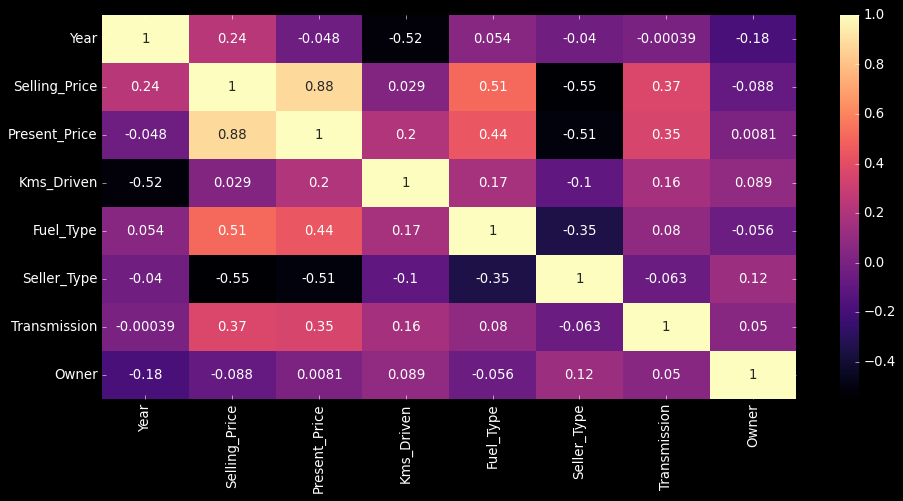

In [79]:
####correlation between the features

plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True,cmap='magma')

In [34]:
#### divided independet and dependet features

X = data.drop(['Selling_Price'],axis=1)
y = data['Selling_Price']

In [35]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [36]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [37]:
###splitting training and test data


from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.1, random_state=2)

In [39]:
##linear regression
lin_reg_model=LinearRegression()

In [40]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [41]:
### prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [71]:
### r2 score
error_score=metrics.r2_score(y_train,training_data_prediction)
print('r2 squre value is:',error_score*100,'%')

r2 squre value is: 84.27856123435794 %


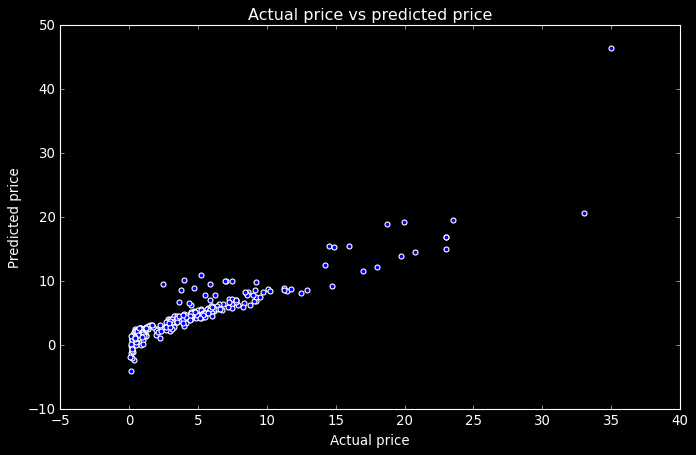

In [72]:
style.use('dark_background')
plt.figure(figsize=(10,6))


plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs predicted price')
plt.show()

In [47]:
###from the above graph showing that  the prreedicted values are very close to the original sold price

In [48]:
### prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [70]:
### r2 score
error_score=metrics.r2_score(y_test,test_data_prediction)
print('r2 squre value is:',error_score*100,'%')

r2 squre value is: 87.09167941173195 %


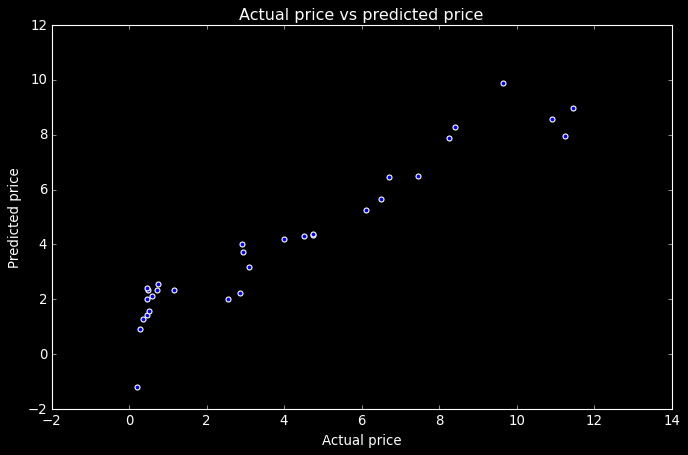

In [73]:
plt.figure(figsize=(10,6))

plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs predicted price')
plt.show()

In [52]:
###lasso regression

lass_reg_model=Lasso()

In [53]:
lass_reg_model.fit(X_train,y_train)

Lasso()

In [54]:
### prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [69]:
### r2 score
error_score=metrics.r2_score(y_train,training_data_prediction)
print('r2 squre value is:',error_score*100,'%')

r2 squre value is: 84.27856123435794 %


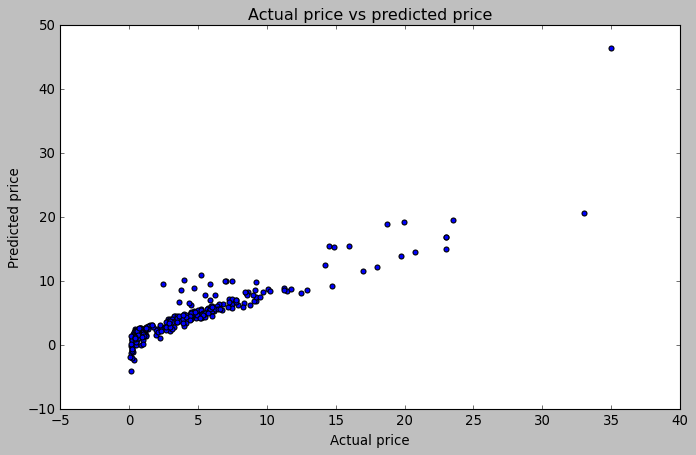

In [59]:
style.use('classic')
plt.figure(figsize=(10,6))

plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs predicted price')
plt.show()

In [60]:
### prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)### prediction on training data
test_data_prediction = lass_reg_model.predict(X_test)

In [68]:
### r2 score
error_score=metrics.r2_score(y_test,test_data_prediction)
print('r2 squre value is:',error_score*100,'%')

r2 squre value is: 87.09167941173195 %


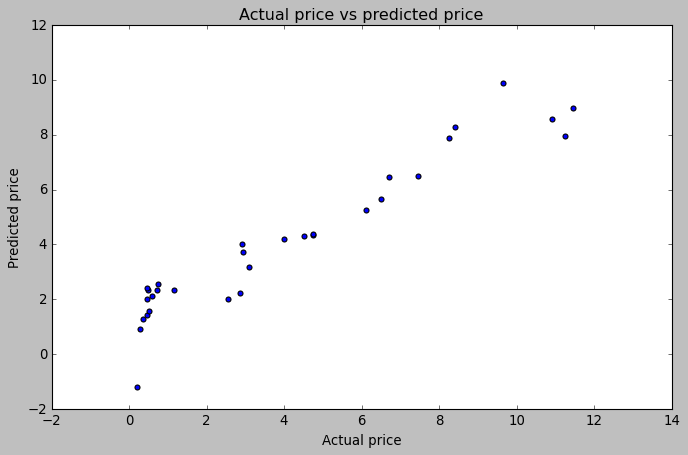

In [64]:
plt.figure(figsize=(10,6))

plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs predicted price')
plt.show()